In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("UCI_Credit_Card.csv")
print("Dataset dimensions:", df.shape)  # Display the shape of the dataset
df.head()



Dataset dimensions: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
# View the structure of the dataset
df.info()

# Display descriptive statistics of the dataset
df.describe()

# Check the distribution of the target variable (default vs. no default)
df['default.payment.next.month'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

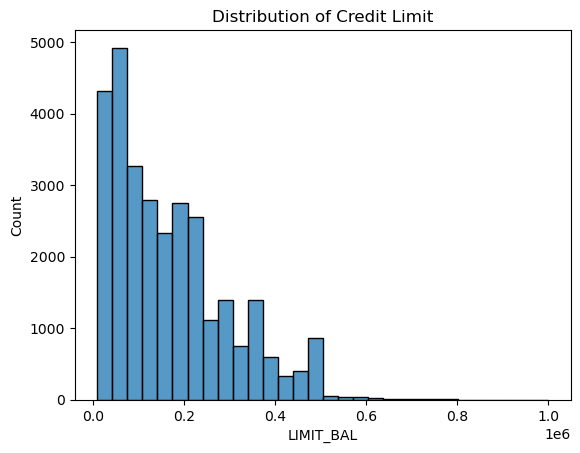

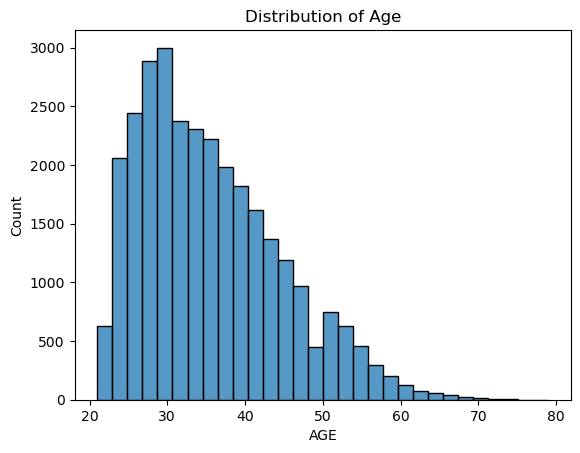

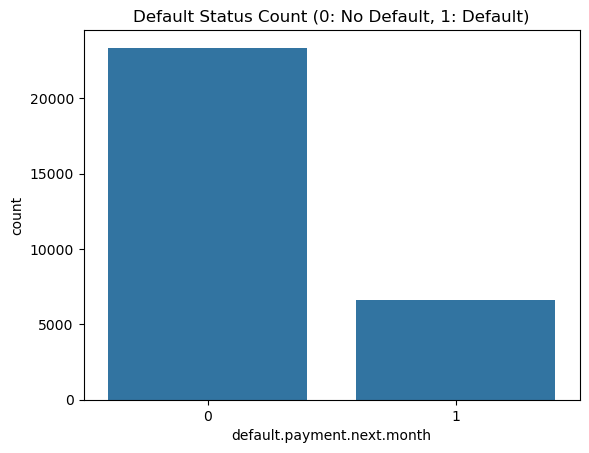

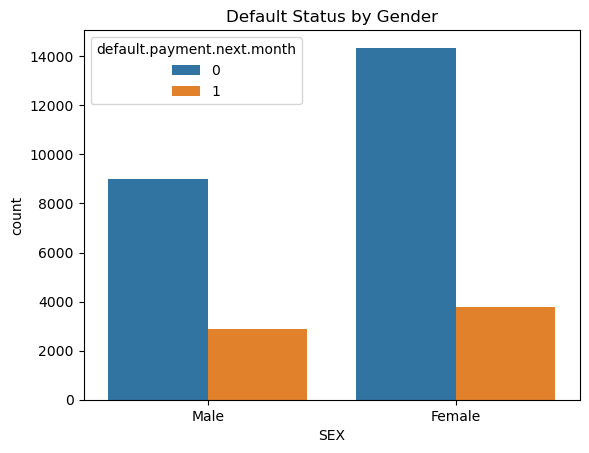

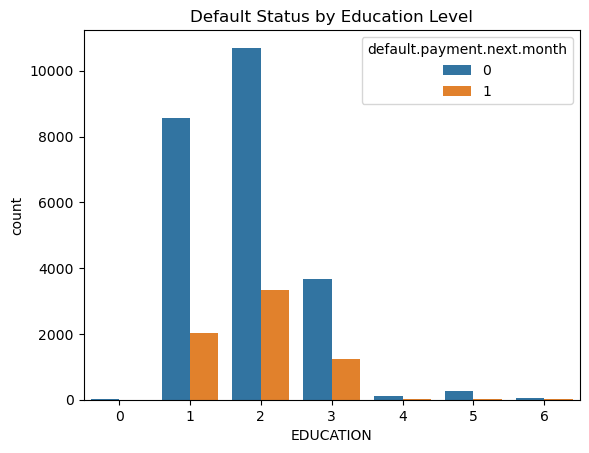

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of credit limit
sns.histplot(df['LIMIT_BAL'], bins=30)
plt.title('Distribution of Credit Limit')
plt.show()

# Distribution of age
sns.histplot(df['AGE'], bins=30)
plt.title('Distribution of Age')
plt.show()

# Default status counts
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Default Status Count (0: No Default, 1: Default)')
plt.show()

# Default status by gender
sns.countplot(x='SEX', hue='default.payment.next.month', data=df)
plt.title('Default Status by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Default status by education level
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
plt.title('Default Status by Education Level')
plt.show()



In [16]:
print("Column names: ", df.columns.tolist())
print("\nMissing value summary:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe())


Column names:  ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']

Missing value summary:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                   

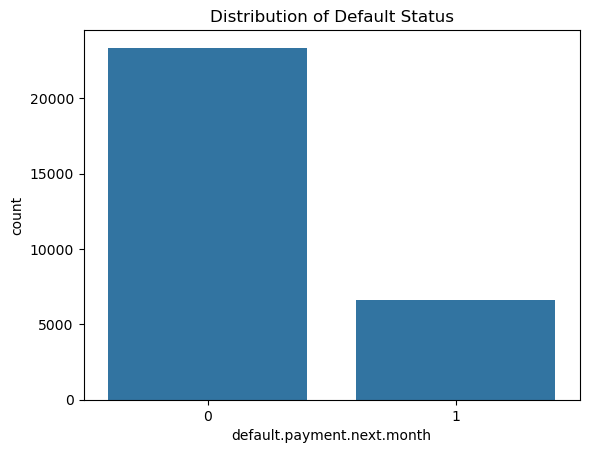

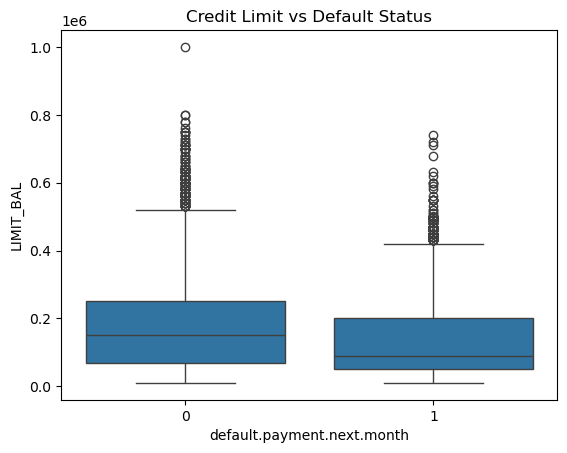

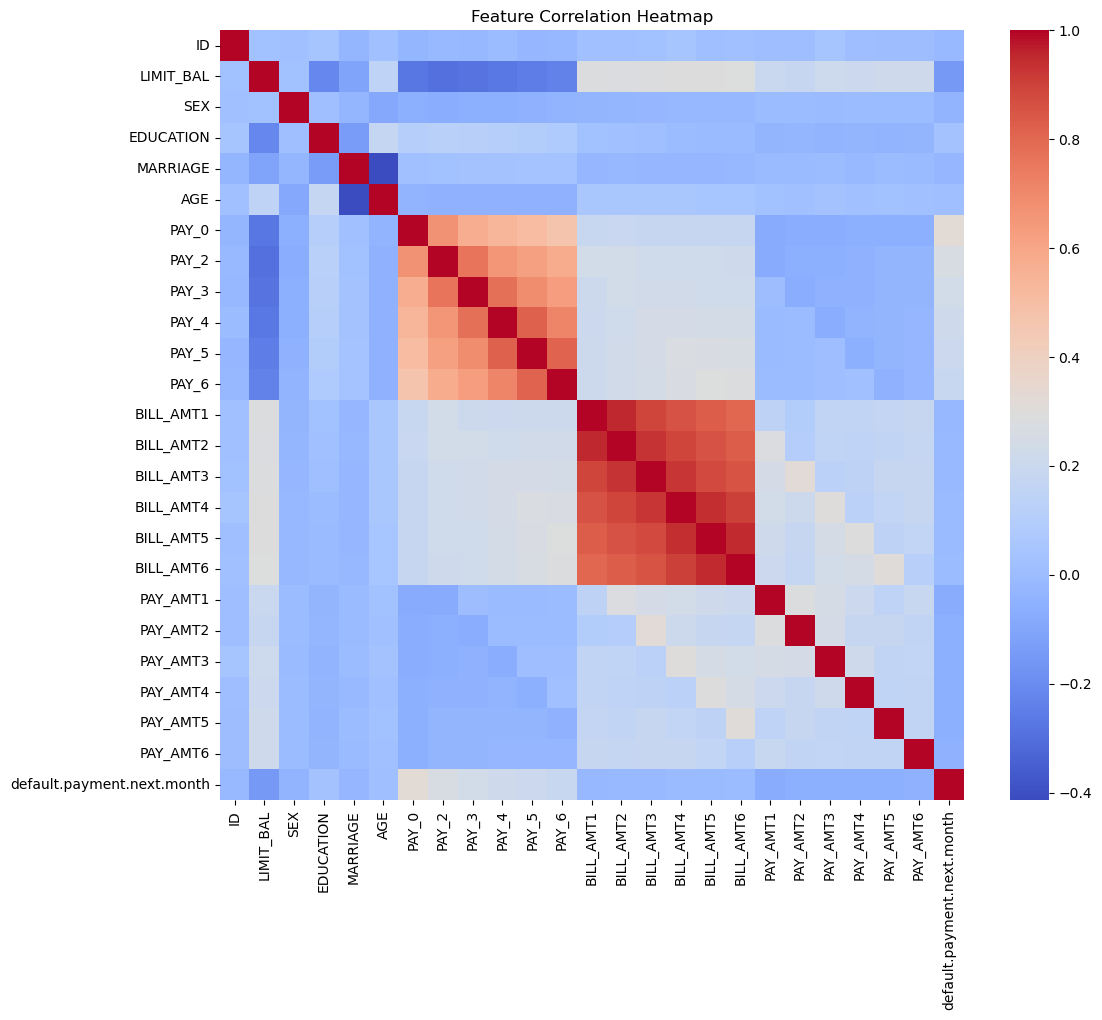

In [17]:
# 1. Distribution of the target variable (default status)
sns.countplot(x='default.payment.next.month', data=df)
plt.title("Distribution of Default Status")
plt.show()

# 2. Compare credit limit across default status
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)
plt.title("Credit Limit vs Default Status")
plt.show()

# 3. Correlation heatmap of all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["default.payment.next.month", "ID"])  # Features (excluding target and ID)
y = df["default.payment.next.month"]  # Target variable (default status)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled features
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=2000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[4529  144]
 [1009  318]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

ROC AUC Score: 0.7075692247355335


In [21]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['default.payment.next.month', 'ID'])  # Drop target and ID column
y = df['default.payment.next.month']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check original class distribution
print("Original class distribution in training set:", y_train.value_counts())

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
print("Class distribution after SMOTE:", y_train_resampled.value_counts())


Original class distribution in training set: default.payment.next.month
0    18691
1     5309
Name: count, dtype: int64
Class distribution after SMOTE: default.payment.next.month
0    18691
1    18691
Name: count, dtype: int64


In [30]:
# Step 3: Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Print results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[3362 1311]
 [ 555  772]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78      4673
           1       0.37      0.58      0.45      1327

    accuracy                           0.69      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000

ROC AUC Score: 0.6915348977620155
